In [6]:
# import required libraries
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing
import pandas as pd

In [ ]:
Dummy example with random generated data

Estimated bandwidth:  2.43664337708
Number of clusters generated:  3
Centers
[[  3.01999144   9.98563671  10.07553583]
 [  1.0139103    1.04567685   0.9787424 ]
 [  4.97203447   5.00464708   4.95651189]]


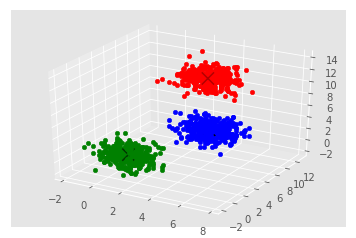

In [14]:
# Generate sample data
centers = [[1, 1, 1], [5, 5, 5], [3, 10,10]]
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=1)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
print("Estimated bandwidth: ", bandwidth)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
clusterCenters  = ms.cluster_centers_
nClusters = len(np.unique(labels))
print("Number of clusters generated: ", nClusters)
print("Centers")
print(clusterCenters)

colors = 10*['r','g','b','c','k,','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c = colors[labels[i]], marker = 'o')


ax.scatter(clusterCenters[:,0], clusterCenters[:,1], clusterCenters[:,2],
           marker='x',color='k',s=150,linewidths = 5, zorder = 10)

plt.show()

Iris Data Set

number of estimated clusters : 3


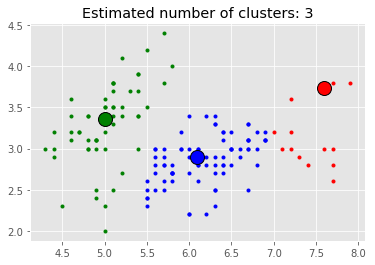

classs,setosa,versicolor,virginica
labels,,,
0,0,43,37
1,50,6,1
2,0,1,12


In [8]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

#X = preprocessing.scale(X)
#print(iris)
#print(X)


bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)


ms.fit(X)
labels = ms.labels_
clusterCenters = ms.cluster_centers_

labelsUnique = np.unique(labels)
nClusters = len(labelsUnique)

print("number of estimated clusters : %d" % nClusters)


#plot result

from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(nClusters), colors):
    my_members = labels == k
    cluster_center = clusterCenters[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % nClusters)
plt.show()

df = pd.DataFrame({'labels':labels})

def class_label(theta):
    if theta == 0:
        return iris.target_names[0]
    if theta == 1:
        return iris.target_names[1]
    if theta == 2:
        return iris.target_names[2]


df['classs'] = [class_label(theta) for theta in iris.target]

ct = pd.crosstab(df['labels'],df['classs'])
ct